<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Просмотр-данных" data-toc-modified-id="Просмотр-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Просмотр данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-столбца-meaning---назначение-платежа" data-toc-modified-id="Изучение-столбца-meaning---назначение-платежа-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение столбца meaning - назначение платежа</a></span></li><li><span><a href="#Каналы-оплаты" data-toc-modified-id="Каналы-оплаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Каналы оплаты</a></span></li><li><span><a href="#Период" data-toc-modified-id="Период-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Период</a></span></li><li><span><a href="#Рекурентность" data-toc-modified-id="Рекурентность-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Рекурентность</a></span></li><li><span><a href="#Пол" data-toc-modified-id="Пол-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Пол</a></span></li><li><span><a href="#Город" data-toc-modified-id="Город-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Город</a></span></li><li><span><a href="#Сумма-пожертвований" data-toc-modified-id="Сумма-пожертвований-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Сумма пожертвований</a></span></li></ul></li></ul></div>

In [ ]:
#импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.simplefilter('ignore', FutureWarning)

In [ ]:
#для лемматизации
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
#форматирование вывода
pd.set_option('max_rows', 10)
pd.set_option('display.float_format', '{:.2f}'.format)

## Просмотр данных

In [ ]:
! gdown 1CVgAktxM9bK2x2AxjTq3Z9-A0YzrJ0R9

Downloading...
From: https://drive.google.com/uc?id=1CVgAktxM9bK2x2AxjTq3Z9-A0YzrJ0R9
To: /content/charity.xlsx
100% 780k/780k [00:00<00:00, 45.8MB/s]


In [ ]:
#чтение данных
donations = pd.read_excel('/content/charity.xlsx', sheet_name='Пожертвования')

In [ ]:
#функция для изучения общей информации о данных
def description(x):
    print('\033[1m' + 'Получение общей информации о данных в таблице:' + '\033[0m')
    display(x.info())
    print('\033[1m' + 'Количество строк и столбцов:' + '\033[0m')
    display(x.shape)
    print('\033[1m' + 'Подсчёт пропусков в таблице:' + '\033[0m')
    display(pd.concat([x.isna().sum(), x.isna().mean()], axis=1)\
    .rename(columns={0:'кол-во', 1:'доля'})\
    .style.format({'кол-во':'{:.0f}', 'доля':'{:.2%}'}))
    print('\033[1m' + 'Наличие дубликатов в таблице:' + '\033[0m')
    display(x.duplicated().sum())
    print('\033[1m' + 'Доля дубликатов в таблице:' + '\033[0m')
    display("{:.3%}".format(x.duplicated().sum() / len(x), 2))
    print('\033[1m' + 'Уникальные значения в таблице:' + '\033[0m')
    display(x.nunique())
    print('\033[1m' + 'Вывод первых пяти строк из таблицы:' + '\033[0m')
    display(x.head())

In [ ]:
#просмотр данных
description(donations)

Получение общей информации о данных в таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14043 entries, 0 to 14042
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Donor ID            14043 non-null  object        
 1   Дата платежа        14043 non-null  datetime64[ns]
 2   Сумма платежа       14043 non-null  float64       
 3   Рекуррентный        14043 non-null  object        
 4   Назначение платежа  12774 non-null  object        
 5   Канал оплаты        14043 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 658.4+ KB


None

Количество строк и столбцов:


(14043, 6)

Подсчёт пропусков в таблице:


,кол-во,доля
Donor ID,0,0.00%
Дата платежа,0,0.00%
Сумма платежа,0,0.00%
Рекуррентный,0,0.00%
Назначение платежа,1269,9.04%
Канал оплаты,0,0.00%


Наличие дубликатов в таблице:


12

Доля дубликатов в таблице:


'0.085%'

Уникальные значения в таблице:


Donor ID               3683
Дата платежа          13386
Сумма платежа           373
Рекуррентный              2
Назначение платежа      893
Канал оплаты              4
dtype: int64

Вывод первых пяти строк из таблицы:


,Donor ID,Дата платежа,Сумма платежа,Рекуррентный,Назначение платежа,Канал оплаты
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.00,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.00,Нет ...,SMS bdd,SMS
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.00,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.00,Нет ...,NaN,SMS
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.00,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты


In [ ]:
#переименование столбцов
donations = donations.rename(columns = {'Donor ID' : 'donor_id', 'Сумма платежа':'amount','Дата платежа' : 'date', 
                          'Назначение платежа' : 'purpose', 'Рекуррентный':'is_reccurent', 'Канал оплаты':'channel' })

Вывод по качеству данных:
- типы данных соответсвуют;
- дубликатов нет;
- пропущены значения по столбцу 'meaning', их доля составляет меньше 2%;
- названия столбцов привели к стандратному виду

In [ ]:
#чтение данных
donors=pd.read_excel('/content/charity.xlsx', sheet_name='Доноры')

In [ ]:
#просмотр данных
description(donors)

Получение общей информации о данных в таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ID                               3683 non-null   object        
 1   Пол                              2431 non-null   object        
 2   Город                            1015 non-null   object        
 3   Дата последней email активности  1835 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 115.2+ KB


None

Количество строк и столбцов:


(3683, 4)

Подсчёт пропусков в таблице:


,кол-во,доля
ID,0,0.00%
Пол,1252,33.99%
Город,2668,72.44%
Дата последней email активности,1848,50.18%


Наличие дубликатов в таблице:


0

Доля дубликатов в таблице:


'0.000%'

Уникальные значения в таблице:


ID                                 3683
Пол                                   2
Город                               234
Дата последней email активности     653
dtype: int64

Вывод первых пяти строк из таблицы:


,ID,Пол,Город,Дата последней email активности
0,AF575B85-917F-475D-8875-00055586E05B,NaN,NaN,NaT
1,229A9B43-3A15-4A48-8CB6-000EDB240D50,NaN,NaN,NaT
2,C6606486-05A8-4437-ACF9-00344E54FEE1,NaN,NaN,NaT
3,6ED86154-A688-4A11-868F-006209035413,Женский ...,NaN,NaT
4,46C41E20-EA56-4698-9C37-00692FD6FFE8,Женский ...,NaN,NaT


In [ ]:
#переименование столбцов
donors = donors.rename(columns = {'ID' : 'donor_id', 'Пол' : 'gender','Город' : 'city', 
                          'Дата последней email активности' : 'last_email_dt'})

Вывод: 
- типы данных соответствующие;
- пропущенные значения по столбцам присутствуют;
- всего уникальных доноров 3683;
- названия столбцов привели к общему виду

## Исследовательский анализ данных

### Изучение столбца meaning - назначение платежа

In [ ]:
#объединение таблиц
dd = donations.merge(donors, on='donor_id', how='left')

In [ ]:
#удалим пробелы в начале и в конце строк, приведем все записи к нижнему регистру
for column in dd.select_dtypes("object").columns:
    dd[column] = dd[column].str.lower()
    dd[column] = dd[column].str.strip()

In [ ]:
#просмотр пропущенных значений по столбцу назначения платежа
dd['purpose'] = dd['purpose'].astype('str')
(
    dd[dd['purpose'] == 'nan'].
 groupby(['is_reccurent','channel']).
 agg({'donor_id':['count','nunique']})
 )

donor_id        
                                 count nunique
is_reccurent channel                          
нет          sms                  1221    1053
             банковские карты       49      38

Вывод: Можем сделать вывод, что пожертвования, у которых не указана назначение, являются нерекурентными и чаще всего совершают через SMS. Для них в столбце назначение платежа можно проставить SMS. Это может свидетельствовать о единоразовом пожертвовании, скорее всего заинтересованность у таких доноров минимальна.

#### **Первый вариант группировки для столбца назнечения платежей**

In [ ]:
with pd.option_context("display.max_rows", 1000):
  display(dd['purpose'].value_counts().reset_index().head(30))

,index,purpose
0,пожертвование,3837
1,пожертвование в фонд помощи детям-отказникам и...,3335
2,пожертвование undefined,2162
3,nan,1270
4,добровольное пожертвование. ндс не облагается,497
5,sms bdd,253
6,пожертвование клуб друзей,127
7,на психологические консультации артёму,87
8,пожертвование без назначения,72
9,пожертвование на обучение артёма,62


Исходя из данных и информации на сайте, можно предположить следующие варианты пожертвований: 
- регулярные пожертвования фонду, то есть оформление рекурентных платежей;
- помощь конкретному ребенку, по программе, например, на обучение, на тьютора, на получение новой профессии;
- также выделим категории возврат и sms, поскольку, в первом случае, нам непонятно что это значит, а во втором, как ранее убедились, такие пожертвования приходят без назначения платежей.


In [ ]:
#создание собственной функции 
def rename (row):
    if 'пожертвование' in row or 'взнос' in row or 'благотворит' in row:
            return 'пожертвование' 
    if 'возврат' in row:
            return 'возврат'
    if 'nan'in row or 'sms' in row:
            return 'смс'
    if 'пополнение' in row:
            return 'пополнение рс'
    else:
            return 'по программе'       
    return row

dd['new_purpose'] = dd['purpose'].apply(rename)

In [ ]:
dd['new_purpose'].value_counts()

пожертвование    11102
смс               1523
по программе      1392
возврат             24
пополнение рс        2
Name: new_purpose, dtype: int64

In [ ]:
dd.groupby('new_purpose').agg({'donor_id':'nunique', 'amount':'sum'}).reset_index()

,new_purpose,donor_id,amount
0,возврат,10,290912.00
1,по программе,613,3037826.15
2,пожертвование,2131,19657040.51
3,пополнение рс,1,724000.00
4,смс,1233,456059.00


Вывод: в целом пожертвования можно разделить на две группы целевое и нецелевое, где целевое - это помощь конкретному ребенку или по определенной программе, а нецелевое - помощь фонду в целом. (принять решение на усмотрение команды)

Также важно отметить, что в большинстве случаев пожертвования перечисляются в целом на фонд, чем по программе.

#### **Второй подход к категоризации значений в назначении платежей - Лемматизация**

In [ ]:
lemmatizer = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

In [ ]:
def lemmatize_text(purpose):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(purpose)]

In [ ]:
dd['purpose_lemmatized'] = dd.purpose.apply(lemmatize_text)
dd.head()

,donor_id,date,amount,is_reccurent,purpose,channel,gender,city,last_email_dt,new_purpose,purpose_lemmatized
0,de5393f9-9585-4057-b7fb-24b69697fc08,2022-07-03 19:49:48,300.00,да,пожертвование undefined,банковские карты,женский,москва,2022-06-03 20:15:57,пожертвование,"[пожертвование, undefined]"
1,81cd4bef-443e-4d36-b34f-664e11182d65,2020-03-14 12:20:02,300.00,нет,sms bdd,sms,женский,москва,2022-07-18 17:19:02,смс,"[sm, bdd]"
2,d3beb76d-d8b6-47e2-8109-44f1b278943b,2022-04-07 00:00:00,16.00,нет,добровольное пожертвование. ндс не облагается,прямые поступления на счет,мужской,NaN,NaT,пожертвование,"[добровольное, пожертвование., ндс, не, облага..."
3,f1310736-b229-4aac-99b7-f13acecf67cb,2019-12-26 02:25:42,300.00,нет,nan,sms,NaN,NaN,NaT,смс,[nan]
4,61c3d86b-39da-445c-9d7f-9924ce9bda14,2021-06-26 01:26:07,200.00,да,пожертвование undefined,банковские карты,женский,NaN,2022-07-20 20:32:37,пожертвование,"[пожертвование, undefined]"


Вывод: далее использовать лемматизацию считаю бессмысленно. По итогу получаем тоже самое.

In [ ]:
dd[dd['new_purpose']=='по программе'].groupby(['is_reccurent','channel']).agg({'donor_id':['count', 'nunique'], 'amount':['sum']})

donor_id             amount
                                           count nunique        sum
is_reccurent channel                                               
да           банковские карты                 25       6   27100.00
нет          банковские карты               1359     604 2959426.15
             прямые поступления на счет        8       5   51300.00

Вывод: при пожертвовании по какой-либо программе, доноры не оформляют подписку, однако помощь оказывают не единоразово.

In [ ]:
dd[dd['new_purpose']=='пожертвование'].groupby(['is_reccurent','channel']).agg({'donor_id':['count', 'nunique'], 'amount':['sum']})

donor_id             amount
                                           count nunique        sum
is_reccurent channel                                               
да           банковские карты               8060     481 5830696.00
нет          банковские карты               1711    1183 4654568.63
             наличные в кассу                  2       1  410700.00
             прямые поступления на счет     1329     561 8761075.88

Вывод: 
- прямые поступления на счет,вероятнее всего, совершаются юридическими лицами и они занимают первое место по объему пожертвований;
- второе место занимают доноры, оформившие подписку;
- и на третьем доноры, которые не оформили подписку
Здесь же можно выделить, что доноры оформившие подписку приносят пожертвований больше. 12122 VS 3935


### Каналы оплаты 

In [ ]:
dd['channel'].value_counts()


банковские карты              11204
sms                            1474
прямые поступления на счет     1362
наличные в кассу                  3
Name: channel, dtype: int64

In [ ]:
dd.groupby('channel').agg({'donor_id':'nunique', 'amount':'sum'}).sort_values(by = 'amount', ascending = False)

,donor_id,amount
channel,,
банковские карты,1991,13530110.78
прямые поступления на счет,567,9127287.88
наличные в кассу,1,1110700.00
sms,1197,397739.00


Вывод: больше всего поступлений приходит по каналу банковские карты, им пользуется больше половины доноров, второй по популярности, но приносящий наименьшую сумму пожертвований sms, а наличные в кассу заносил 1 человектри раза, но очень большие суммы.

### Период

In [ ]:
display(donations['date'].min(), donations['date'].max())

Timestamp('2015-07-19 20:10:11')

Timestamp('2022-07-28 19:22:15')

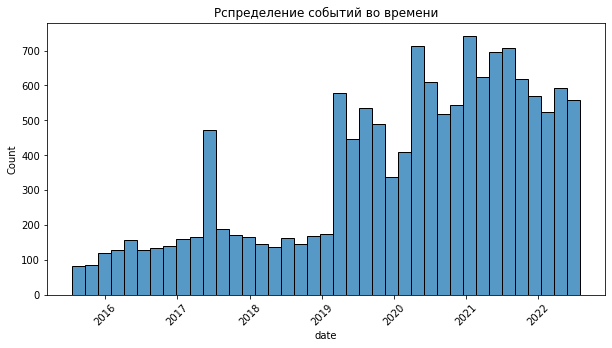

In [ ]:
plt.figure (figsize = (10,5))
sns.histplot(dd['date'])
plt.xticks(rotation = 45)
plt.title('Распределение событий во времени');

Вывод: активность доноров возросла с 2019 года, необходимо уточнить у заказчика, чем это могло быть обусловлено

### Рекуррентность 

In [ ]:
dd['is_reccurent'].value_counts(normalize=True)

да    0.58
нет   0.42
Name: is_reccurent, dtype: float64

In [ ]:
dd.groupby('is_reccurent').agg({'donor_id':'nunique'})

,donor_id
is_reccurent,
да,486
нет,3334


Вывод: рекуррентных платежей больше, чем нерекуррентных, но пользователей оформивших подписку в почти 7 раз меньше. 

Для удобства дальнейшего исследования, заменим значения да - 1 и нет - 0

In [ ]:
def rename (row):
    if 'да' in row:
            return 1 
    if 'нет' in row:
            return 0      
    return row

dd['is_reccurent'] = dd['is_reccurent'].apply(rename)

### Пол

In [ ]:
donors['gender'].value_counts(normalize=True)

Женский                                                                                                                                                                                                                                                      0.77
Мужской                                                                                                                                                                                                                                                      0.23
Name: gender, dtype: float64

Женщин доноров намного больше, чем мужчин. Рассмотрим частоту пожертвований.

In [ ]:
dd['gender'].value_counts(normalize=True)

женский   0.78
мужской   0.22
Name: gender, dtype: float64

По частоте пожертвований также лидируют женщины.

### Город

In [ ]:
dd['city'].value_counts(normalize=True)

москва            0.54
санкт-петербург   0.07
краснодар         0.03
якутск            0.02
екатеринбург      0.01
                  ... 
амангильдино      0.00
кингисеппский     0.00
туапсе            0.00
бирск             0.00
шемышейка         0.00
Name: city, Length: 228, dtype: float64

Больше всего пожертвований приходится на Москву.

### Сумма пожертвований

In [ ]:
dd['amount'].describe()

count     14043.00
mean       1720.85
std       29499.77
min           0.01
25%         150.00
50%         350.00
75%         700.00
max     3000000.00
Name: amount, dtype: float64

Важно отметить, что средняя и медианная сумму пожертвований сильно различается. Это может свидетельствовать о том, что в данных имеются выбросы. Рассмотрим далее диаграмму размаха, которая нам и покажет эти выбросы.

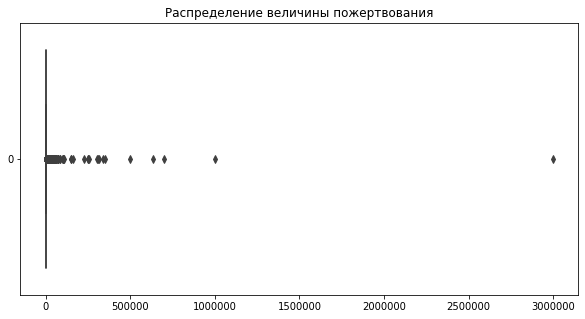

In [ ]:
plt.figure (figsize = (10,5))
sns.boxplot(data=dd['amount'], orient = 'h')
plt.title('Распределение величины пожертвования')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Предположение подтвердилось, в данных действительно есть выбросы. Далее рассмотрим, какие суммы чаще всего жертвовали доноры.

In [ ]:
print(np.percentile(dd['amount'], [95, 99])) 

[ 5000. 13853.]


Не более 5% доноров жертвовали более 5 тысяч рублей и не более 1% жертвовали более 14 тысяч.

Можем сделать вывод, что доноры чаще оставляют пожертвования в размере до 1000 рублей, например, 100, 300, 500, 1000, 5000 рублей. Это может быть связано с тем, что при оформлении ежемесячных платежей данные суммы представлены на выбор. 
Также может предположить, что данный факт связан с рекурентыми платежами. 

Выведем профили доноров с их первым и последним  пожертвованием, с количеством пожертвований 

In [ ]:
profiles = dd.groupby('donor_id').agg({'date': ['min', 'max'], 'amount':'count'}).set_axis(['first_dt', 'last_dt','donations_cnt'], axis=1, inplace=False).reset_index()
profiles['dt_diff'] = (profiles['last_dt']-profiles['first_dt'])/np.timedelta64(1,'M')
profiles['dt_diff'] = profiles['dt_diff'].astype(float).apply(np.floor)
profiles

,donor_id,first_dt,last_dt,donations_cnt,dt_diff
0,0001afdd-94e3-48f3-b5e7-d5539700425e,2019-04-26 19:19:24,2019-04-26 19:19:24,1,0.00
1,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-03-27 08:23:58,2022-06-27 08:24:05,21,27.00
2,0015a100-2d8c-4262-a9b3-bb1461c0c8b8,2021-07-27 12:15:05,2021-07-27 12:17:06,2,0.00
3,002cb994-10cd-45e9-b6ed-ed7f3c90d7a9,2017-04-27 08:26:17,2017-04-27 08:26:17,1,0.00
4,006f71d7-dfcf-4e7a-b9ad-b4721bef4f7a,2019-04-27 00:02:19,2019-04-27 00:02:19,1,0.00
...,...,...,...,...,...
3678,ff946fd1-eef8-4541-a906-bae64527aaa5,2019-05-01 20:27:40,2019-05-01 20:27:40,1,0.00
3679,ffa30123-a516-44a7-b030-f83ed369b645,2020-03-27 19:55:41,2022-07-04 13:32:33,27,27.00
3680,ffb1c4fa-f950-4bb7-a1f2-9dd655298fff,2019-04-26 20:37:02,2019-04-26 20:37:02,1,0.00
3681,ffccba23-89ca-4a22-bd8a-7cad2d9eb7f7,2021-08-29 00:00:00,2021-09-19 00:00:00,6,0.00


In [ ]:
result = dd[['donor_id', 'date', 'amount', 'new_purpose', 'gender', 'is_reccurent']].merge(
    profiles[['donor_id', 'first_dt', 'last_dt' ]], on='donor_id', how='left')


In [ ]:
# вычисляем лайфтайм в разрезе доноров 
result['lifetime_days']= ((result['date']-result['first_dt']).dt.days)
result.sort_values(by =['donor_id','date']).head(10)

,donor_id,date,amount,new_purpose,gender,is_reccurent,first_dt,last_dt,lifetime_days
9911,0001afdd-94e3-48f3-b5e7-d5539700425e,2019-04-26 19:19:24,100.00,смс,NaN,0,2019-04-26 19:19:24,2019-04-26 19:19:24,0
13539,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-03-27 08:23:58,500.00,пожертвование,женский,1,2020-03-27 08:23:58,2022-06-27 08:24:05,0
1631,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-04-29 08:24:29,500.00,пожертвование,женский,1,2020-03-27 08:23:58,2022-06-27 08:24:05,33
10926,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-05-28 08:24:10,500.00,пожертвование,женский,1,2020-03-27 08:23:58,2022-06-27 08:24:05,62
4612,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-07-27 08:24:02,500.00,пожертвование,женский,1,2020-03-27 08:23:58,2022-06-27 08:24:05,122
3269,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-08-27 08:24:04,500.00,пожертвование,женский,1,2020-03-27 08:23:58,2022-06-27 08:24:05,153
9292,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-10-27 08:24:17,500.00,пожертвование,женский,1,2020-03-27 08:23:58,2022-06-27 08:24:05,214
992,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-11-27 08:24:03,500.00,пожертвование,женский,1,2020-03-27 08:23:58,2022-06-27 08:24:05,245
2282,000711b2-2785-461b-bf5b-5cb7d2caba20,2020-12-27 08:24:03,500.00,пожертвование,женский,1,2020-03-27 08:23:58,2022-06-27 08:24:05,275
48,000711b2-2785-461b-bf5b-5cb7d2caba20,2021-02-28 08:24:15,500.00,пожертвование,женский,1,2020-03-27 08:23:58,2022-06-27 08:24:05,338


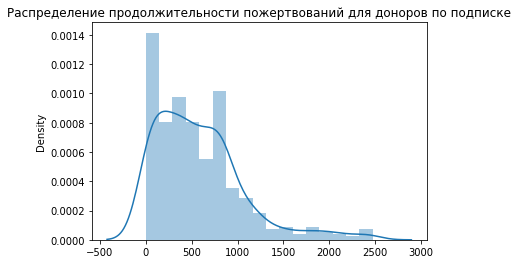

,lifetime_days
count,486.00
mean,579.66
std,485.71
min,0.00
25%,214.00
50%,515.00
75%,821.00
max,2472.00


In [ ]:
result_lifetime = result.query('is_reccurent==1').groupby('donor_id').agg({'lifetime_days': ['max']}).set_axis(['lifetime_days'], axis=1, inplace=False)
sns.distplot(result_lifetime);
plt.title('Распределение продолжительности пожертвований для доноров по подписке')
plt.show()
result_lifetime.describe()

Вывод: доноры, оформившие рекурентный платеж, жертвуют фонду на протяжении полутора лет. 

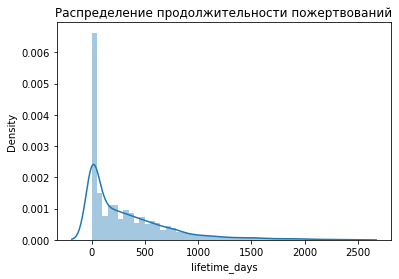

count   14043.00
mean      340.66
std       420.93
min         0.00
25%         0.00
50%       201.00
75%       517.00
max      2486.00
Name: lifetime_days, dtype: float64

In [ ]:
sns.distplot(result['lifetime_days']);
plt.title('Распределение продолжительности пожертвований')
plt.show()
result['lifetime_days'].describe()

Вывод: чаще всего пользователи выбирают однократное пожертвование, но есть доноры, которые совершают пожертвования в течение длительного времени. Поскольку данные распределены неравномерно, будем ориентироваться на медианное значение. Поэтому в среднем жизнедеятельность донора составляет от 7 месяцев

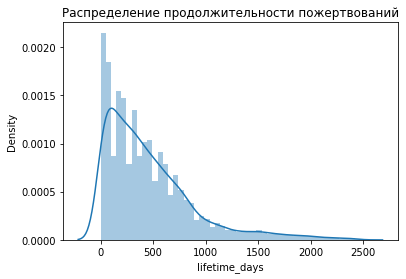

count   8085.00
mean     461.93
std      429.29
min        0.00
25%      152.00
50%      365.00
75%      640.00
max     2472.00
Name: lifetime_days, dtype: float64

In [ ]:
result_1=result.query('is_reccurent==1')
sns.distplot(result_1['lifetime_days']);
plt.title('Распределение продолжительности пожертвований')
plt.show()
result_1['lifetime_days'].describe()